In [102]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm
import seaborn as sns

In [48]:
url = "https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [49]:
print(df.head())

   Year                                     113 Cause Name  \
0  2017  Accidents (unintentional injuries) (V01-X59,Y8...   
1  2017  Accidents (unintentional injuries) (V01-X59,Y8...   
2  2017  Accidents (unintentional injuries) (V01-X59,Y8...   
3  2017  Accidents (unintentional injuries) (V01-X59,Y8...   
4  2017  Accidents (unintentional injuries) (V01-X59,Y8...   

               Cause Name          State  Deaths  Age-adjusted Death Rate  
0  Unintentional injuries  United States  169936                     49.4  
1  Unintentional injuries        Alabama    2703                     53.8  
2  Unintentional injuries         Alaska     436                     63.7  
3  Unintentional injuries        Arizona    4184                     56.2  
4  Unintentional injuries       Arkansas    1625                     51.8  


In [50]:
print(df.columns)

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')


In [51]:
print(df.dtypes)

Year                         int64
113 Cause Name              object
Cause Name                  object
State                       object
Deaths                       int64
Age-adjusted Death Rate    float64
dtype: object


In [52]:
df = pd.read_csv(url)

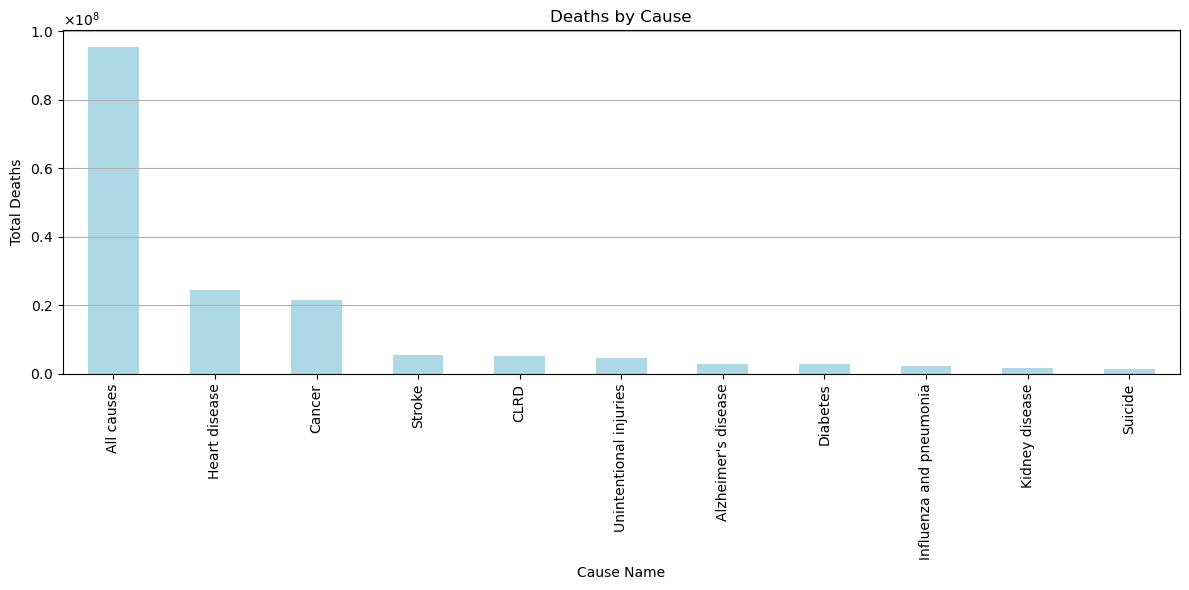

In [60]:
cause_deaths = df.groupby('Cause Name')['Deaths'].sum().sort_values(ascending=False)

# Plot bar plot
plt.figure(figsize=(12, 6))
cause_deaths.plot(kind='bar', color='lightblue')
plt.title('Deaths by Cause')
plt.xlabel('Cause Name')
plt.ylabel('Total Deaths')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Formatting y-axis ticks to display in non-scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))

plt.grid(axis='y')  # Show grid lines only on y-axis
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

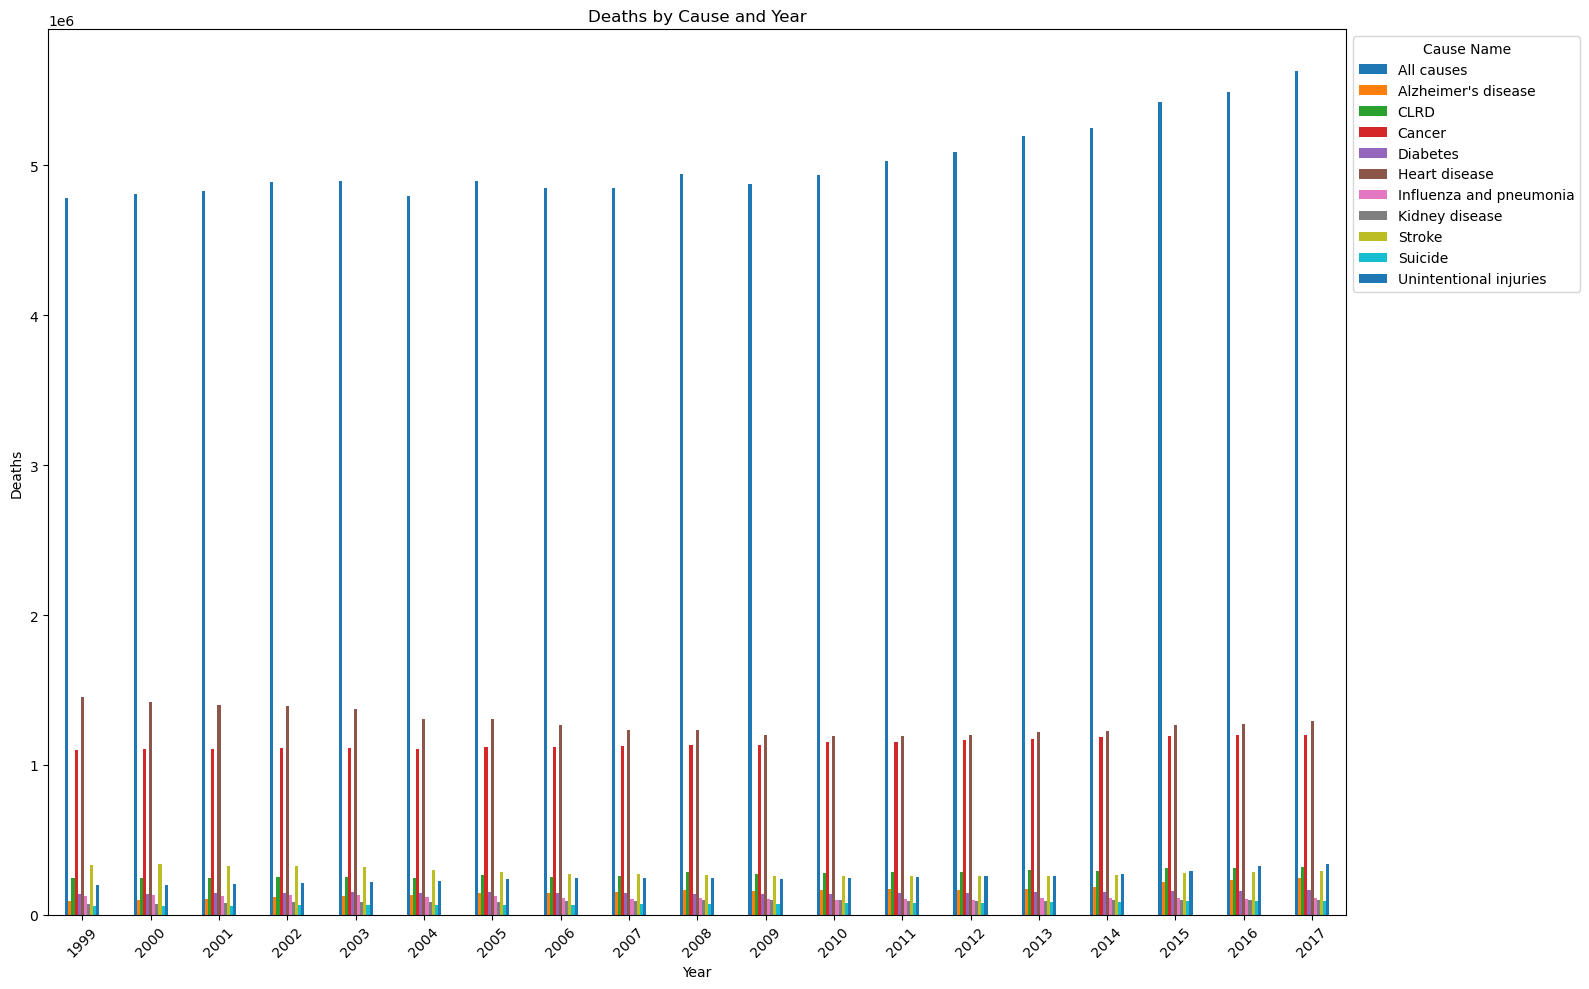

In [54]:


# Group data by 'Year' and 'Cause Name' and sum the 'Deaths' for each group
year_cause_deaths = df.groupby(['Year', 'Cause Name'])['Deaths'].sum().unstack(fill_value=0)

# Plot grouped bar chart
plt.figure(figsize=(16, 10))
year_cause_deaths.plot(kind='bar', stacked=False, figsize=(16, 10))
plt.title('Deaths by Cause and Year')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.legend(title='Cause Name', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

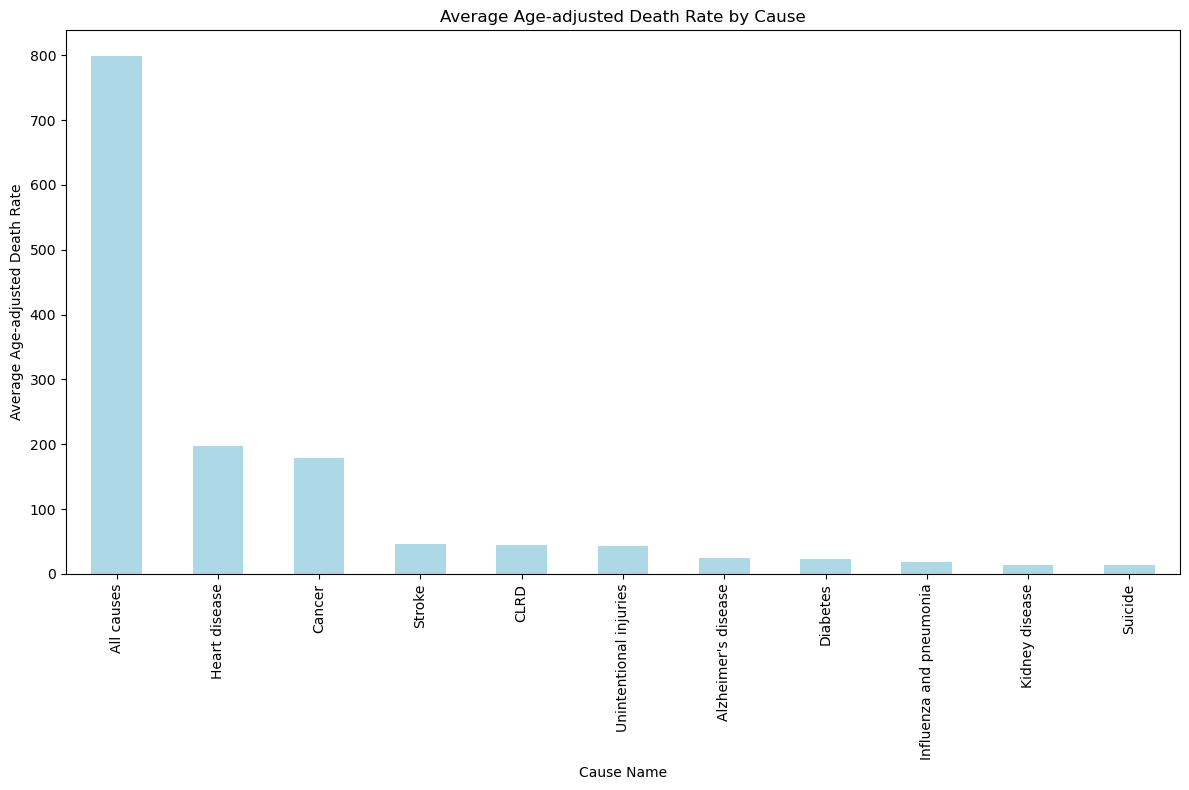

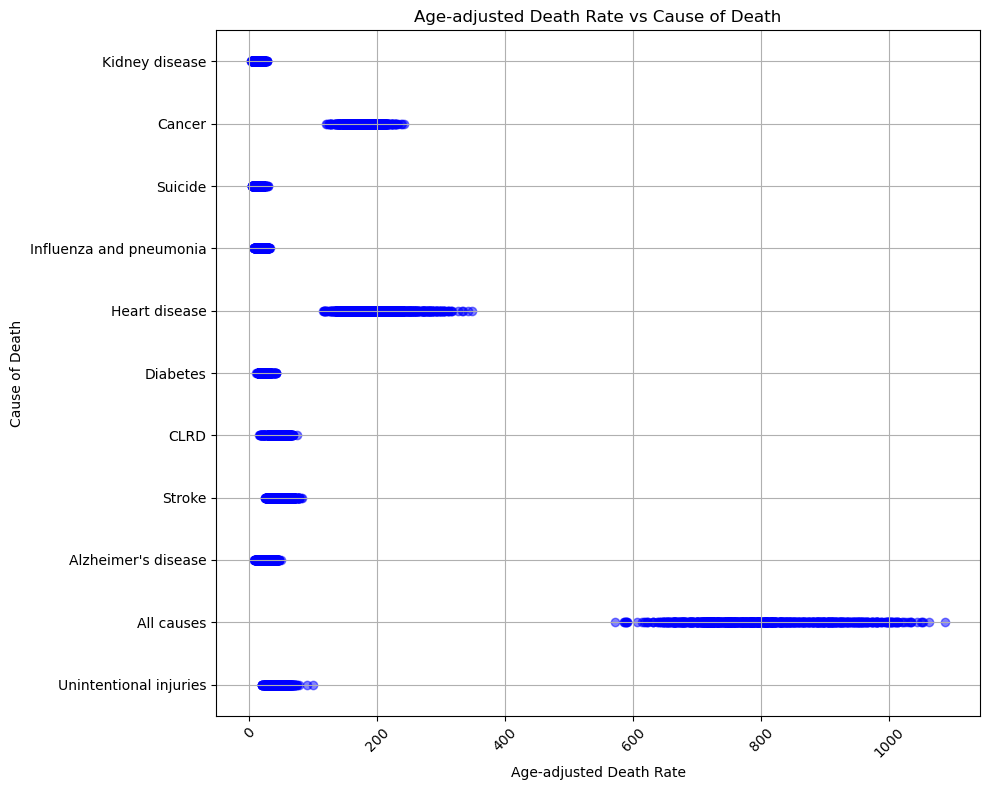

In [71]:
# Group data by 'Cause Name' and calculate the mean 'Age-adjusted Death Rate' for each cause
cause_aadr = df.groupby('Cause Name')['Age-adjusted Death Rate'].mean().sort_values(ascending=False)

# Plot grouped bar chart
plt.figure(figsize=(12, 8))
cause_aadr.plot(kind='bar', color='lightblue')
plt.title('Average Age-adjusted Death Rate by Cause')
plt.xlabel('Cause Name')
plt.ylabel('Average Age-adjusted Death Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='blue', marker='o', alpha=0.5)
plt.title('Age-adjusted Death Rate vs Cause of Death')
plt.xlabel('Age-adjusted Death Rate')
plt.ylabel('Cause of Death')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [72]:
stroke_df = df[df['Cause Name'].str.contains('Stroke', case=False)]

# Descriptive characteristics for 'Age-adjusted Death Rate'
age_adjusted_death_rate_mean = stroke_df['Age-adjusted Death Rate'].mean()
age_adjusted_death_rate_mode = stroke_df['Age-adjusted Death Rate'].mode().iloc[0]
age_adjusted_death_rate_std = stroke_df['Age-adjusted Death Rate'].std()

# Descriptive characteristics for 'Year'
year_mean = stroke_df['Year'].mean()
year_mode = stroke_df['Year'].mode().iloc[0]
year_std = stroke_df['Year'].std()

# Descriptive characteristics for 'Deaths'
deaths_mean = stroke_df['Deaths'].mean()
deaths_mode = stroke_df['Deaths'].mode().iloc[0]
deaths_std = stroke_df['Deaths'].std()

# Print the results
print("Descriptive characteristics for Age-adjusted Death Rate:")
print(f"Mean: {age_adjusted_death_rate_mean}")
print(f"Mode: {age_adjusted_death_rate_mode}")
print(f"Standard Deviation: {age_adjusted_death_rate_std}")
print("\n")

print("Descriptive characteristics for Year:")
print(f"Mean: {year_mean}")
print(f"Mode: {year_mode}")
print(f"Standard Deviation: {year_std}")
print("\n")

print("Descriptive characteristics for Deaths:")
print(f"Mean: {deaths_mean}")
print(f"Mode: {deaths_mode}")
print(f"Standard Deviation: {deaths_std}")

Descriptive characteristics for Age-adjusted Death Rate:
Mean: 45.88856275303644
Mode: 41.8
Standard Deviation: 11.44957053384239


Descriptive characteristics for Year:
Mean: 2008.0
Mode: 1999
Standard Deviation: 5.479999556275358


Descriptive characteristics for Deaths:
Mean: 5519.277327935222
Mode: 260
Standard Deviation: 19641.202841418926


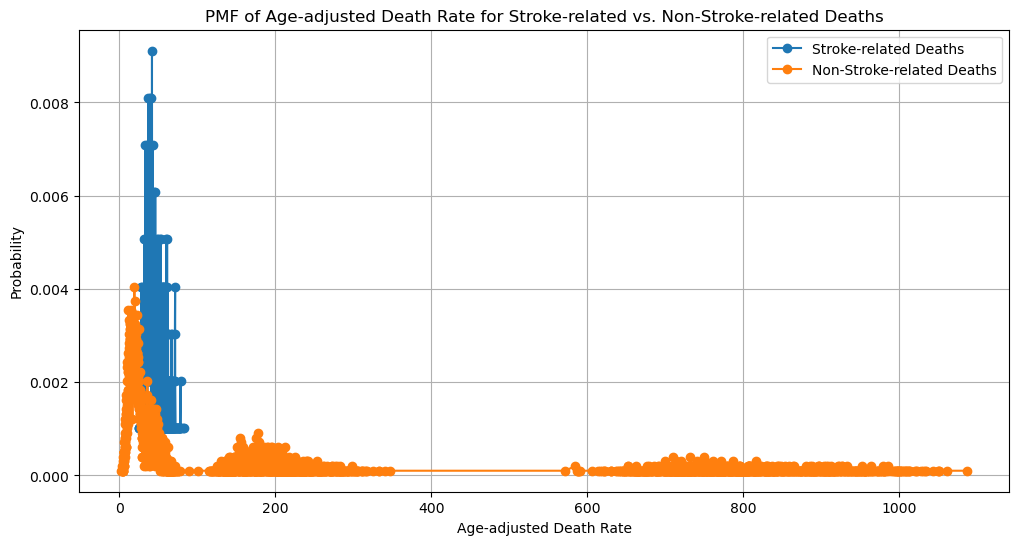

In [73]:
stroke_df = df[df['Cause Name'].str.contains('Stroke', case=False)]
non_stroke_df = df[~df['Cause Name'].str.contains('Stroke', case=False)]

# Calculate PMF for 'Age-adjusted Death Rate' for stroke-related deaths
stroke_pmf = stroke_df['Age-adjusted Death Rate'].value_counts(normalize=True).sort_index()

# Calculate PMF for 'Age-adjusted Death Rate' for non-stroke-related deaths
non_stroke_pmf = non_stroke_df['Age-adjusted Death Rate'].value_counts(normalize=True).sort_index()

# Plot PMFs
plt.figure(figsize=(12, 6))
plt.plot(stroke_pmf.index, stroke_pmf.values, label='Stroke-related Deaths', marker='o', linestyle='-')
plt.plot(non_stroke_pmf.index, non_stroke_pmf.values, label='Non-Stroke-related Deaths', marker='o', linestyle='-')
plt.title('PMF of Age-adjusted Death Rate for Stroke-related vs. Non-Stroke-related Deaths')
plt.xlabel('Age-adjusted Death Rate')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

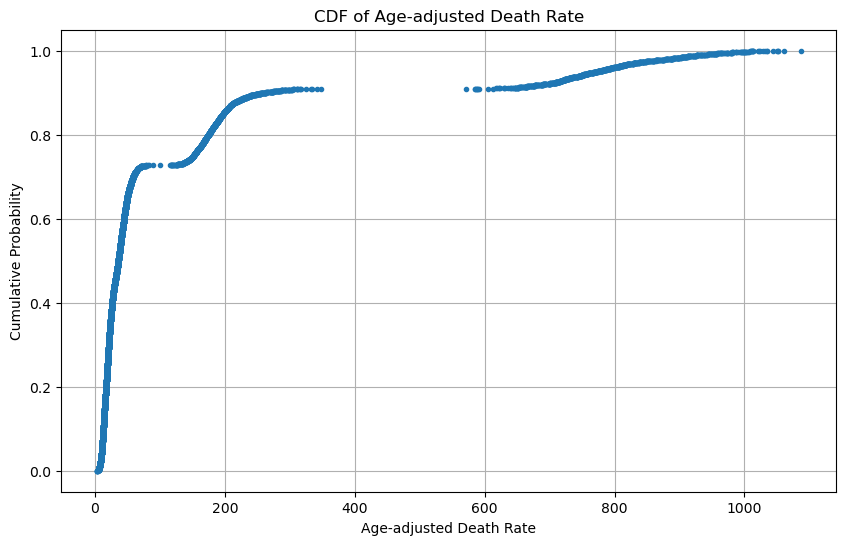

In [76]:
variable = 'Age-adjusted Death Rate'

# Sort the data
sorted_data = np.sort(df[variable])

# Calculate the cumulative probabilities
cumulative_prob = np.linspace(0, 1, len(sorted_data))

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, cumulative_prob, marker='.', linestyle='none')
plt.title('CDF of Age-adjusted Death Rate')
plt.xlabel('Age-adjusted Death Rate')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

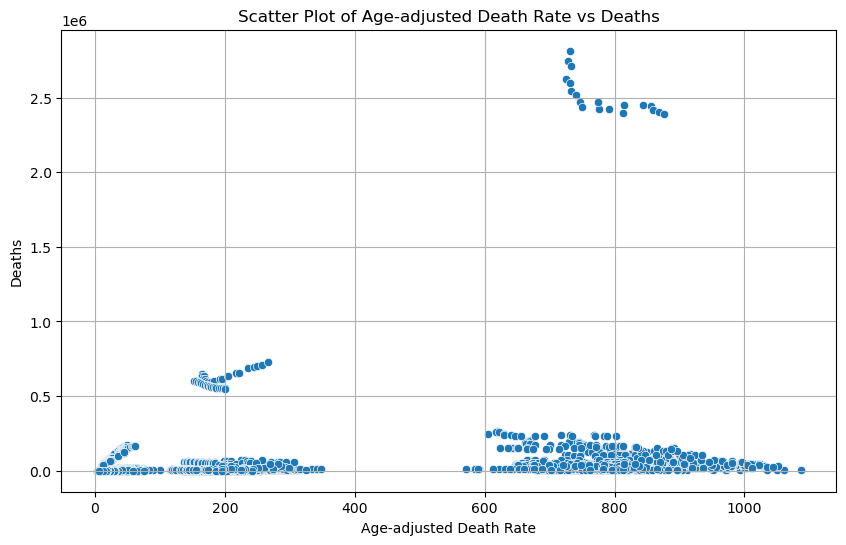

Covariance: 5832474.27516891
Pearson's Correlation Coefficient: 0.23104793715192004


In [80]:
# Select the variables for comparison
x_variable = 'Age-adjusted Death Rate'
y_variable = 'Deaths'

# Remove any NaN values
df_cleaned = df[[x_variable, y_variable]].dropna()

# Calculate covariance
covariance = np.cov(df_cleaned[x_variable], df_cleaned[y_variable])[0, 1]

# Calculate Pearson's correlation coefficient
correlation_coefficient = np.corrcoef(df_cleaned[x_variable], df_cleaned[y_variable])[0, 1]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x=x_variable, y=y_variable)
plt.title(f'Scatter Plot of {x_variable} vs {y_variable}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.grid(True)
plt.show()

# Print covariance and correlation coefficient
print(f'Covariance: {covariance}')
print(f"Pearson's Correlation Coefficient: {correlation_coefficient}")

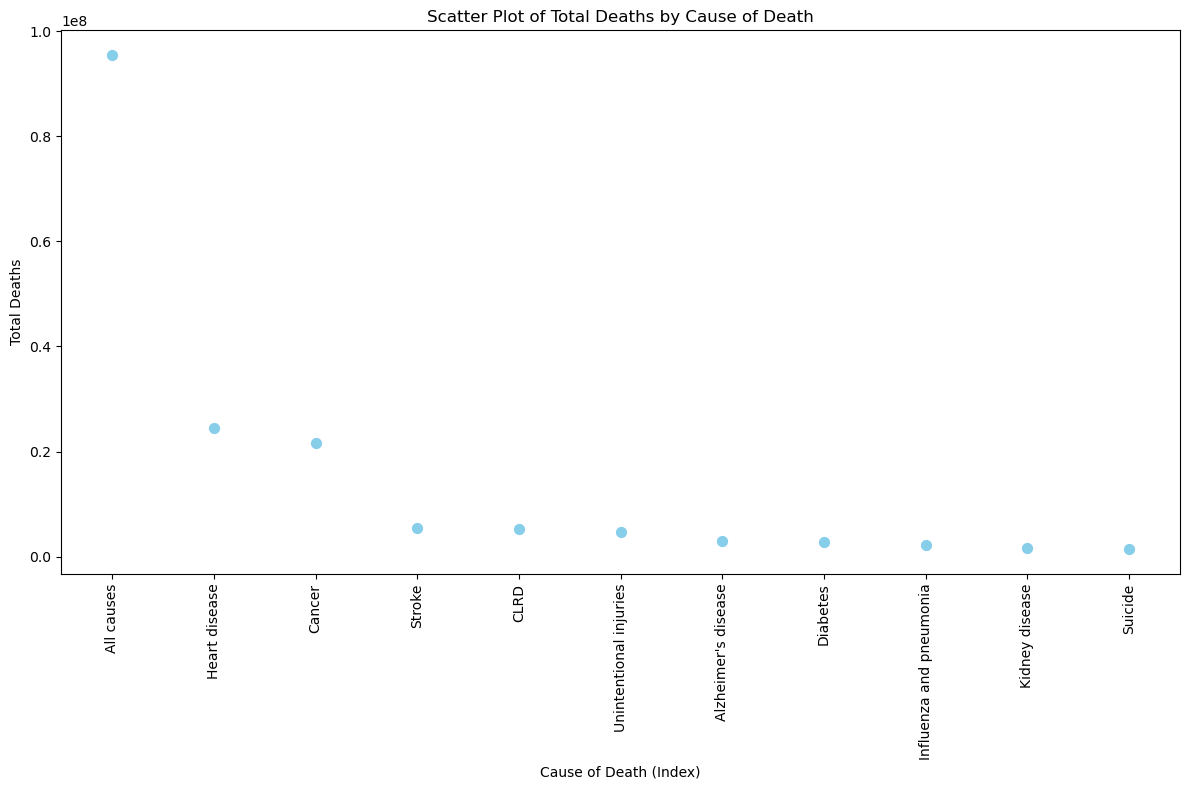

In [87]:

cause_deaths = df.groupby('Cause Name')['Deaths'].sum().sort_values(ascending=False)

# Plot scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(range(len(cause_deaths)), cause_deaths.values, color='skyblue', s=50)
plt.title('Scatter Plot of Total Deaths by Cause of Death')
plt.xlabel('Cause of Death (Index)')
plt.ylabel('Total Deaths')
plt.xticks(ticks=range(len(cause_deaths)), labels=cause_deaths.index, rotation=90)
plt.tight_layout()
plt.show()

In [92]:
# Drop rows with missing values in 'Age-adjusted Death Rate' and 'Cause Name'
df_cleaned = df.dropna(subset=['Age-adjusted Death Rate', 'Cause Name'])

# Perform one-way ANOVA test
groups = []
for cause, group_data in df_cleaned.groupby('Cause Name'):
    groups.append(group_data['Age-adjusted Death Rate'])

f_statistic, p_value = f_oneway(*groups)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 47336.73003024369
P-value: 0.0


In [96]:
# Drop rows with missing values in 'Age-adjusted Death Rate' and 'Year'
df_cleaned = df.dropna(subset=['Age-adjusted Death Rate', 'Year'])

# Convert 'Year' to numeric
df_cleaned['Year'] = pd.to_numeric(df_cleaned['Year'])

# Define the dependent variable (Y) and explanatory variable (X)
Y = df_cleaned['Age-adjusted Death Rate']
X = df_cleaned['Year']

# Add a constant to the independent variable (X) for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Age-adjusted Death Rate   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                  0.001
Method:                      Least Squares   F-statistic:                     16.43
Date:                     Sat, 02 Mar 2024   Prob (F-statistic):           5.09e-05
Time:                             12:54:26   Log-Likelihood:                -74209.
No. Observations:                    10868   AIC:                         1.484e+05
Df Residuals:                        10866   BIC:                         1.484e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

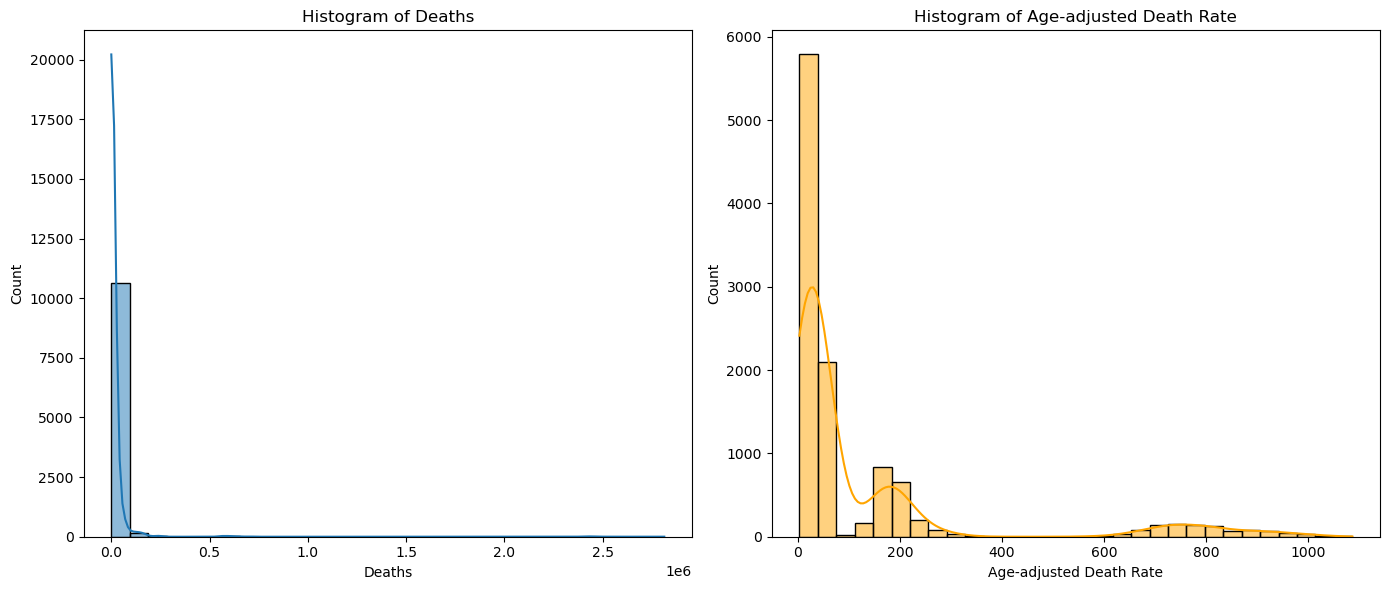

In [112]:
deaths = df['Deaths']
age_adjusted_death_rate = df['Age-adjusted Death Rate']



# Plotting histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(deaths, kde=True, bins=30)
plt.title('Histogram of Deaths')

plt.subplot(1, 2, 2)
sns.histplot(age_adjusted_death_rate, kde=True, bins=30, color='orange')
plt.title('Histogram of Age-adjusted Death Rate')

plt.tight_layout()
plt.show()


